In [4]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime

host = 'http://localhost:8080'


## 2.2 a) Retrieve and print the list of all monitored devices

In [5]:
response = requests.get(host + '/devices')
list_of_monitored_devices = response.json()['mac_addresses']

In [7]:
if response.status_code == 200:
    print(list_of_monitored_devices)
else:
    print(response.status_code, response.reason)

['0x48e7dabccfaa', '0x8c554ab5b764']


## 2.2 b) Retrieve the battery status from a given date range

In [8]:
start_date = '2024-01-25'
end_date = '2024-02-25'

power_plugged = []
battery_level = []

for mac_address in list_of_monitored_devices:
    response = requests.get(host + f'/device/{mac_address}', params = {'start_date': start_date, 'end_date': end_date})
    power_plugged.append(response.json()['power_plugged'])

In [9]:
if response.status_code == 200:
    print('Retrieve data succesfully')
else:
    print(response.status_code, response.reason)

Retrieve data succesfully


Plot the Bar Chart

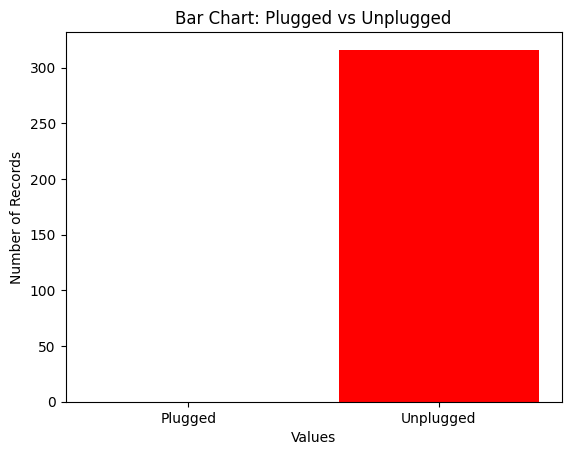

In [10]:
tot_0 = 0
tot_1 = 0

for power_plugged_list in power_plugged:
    count_1 = power_plugged_list.count(1)
    count_0 = power_plugged_list.count(0)
    tot_0 += count_0
    tot_1 += count_1

# Bar chart
categories = ['Plugged', 'Unplugged']
values = [tot_1, tot_0]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Values')
plt.ylabel('Number of Records')
plt.title('Bar Chart: Plugged vs Unplugged')
plt.show()

## 2.2 c) Retrieve and print the list of devices with battery level lower or equal than 25% and power unplugged in the last recorded timestamp.

In [15]:
response = requests.get(host + '/devices', params= {'blt':25, 'plugged':0})



In [16]:
if response.status_code == 200:
    print('Retrieve data succesfully')
    print(response.json()['mac_addresses'])
else:
    print(response.status_code, response.reason)

400 Bad Request


## 2.2 d) Delete the data of the first device in the list of all monitored devices

In [ ]:
response = requests.delete(host+f'/device/{list_of_monitored_devices[0]}')

In [ ]:
if response.status_code == 200:
    print('Delete data succesfully')
else:
    print(response.status_code, response.reason)

Delete data succesfully


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0ec8e575-19c8-4894-9160-01c0b36ec399' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>